#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load and Read Data

In [2]:
# Memuat dataset dan menampilkan isi
df = pd.read_csv('City_Types.csv')
df

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Stockholm,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,2024-12-31 20:00:00+00:00,Stockholm,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,2024-12-31 21:00:00+00:00,Stockholm,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,2024-12-31 22:00:00+00:00,Stockholm,160.0,3.9,0.3,73.0,1.4,2.6,Residential


# Information from data

In [3]:
# Menampilkan informasi dari  datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   Type    52704 non-null  object 
dtypes: float64(6), object(3)
memory usage: 3.6+ MB


# Analysis Deskriptif

In [4]:
# Analysis Deskriptif
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,508.030472,29.616492,22.387250,53.423668,32.931045,50.644980
std,692.274824,23.984409,34.285823,42.225556,43.833691,67.311502
min,0.000000,0.900000,0.000000,0.000000,0.300000,0.400000
25%,187.000000,11.000000,0.700000,26.000000,6.400000,9.400000
50%,268.000000,23.300000,10.500000,48.000000,14.800000,19.800000
75%,519.000000,42.200000,30.200000,69.000000,42.600000,68.350000
max,12876.000000,218.000000,497.800000,342.000000,459.100000,661.200000


In [5]:
# Cek missing values per fitur
print("\nMissing values per fitur: ")
print(df.isnull().sum())


Missing values per fitur: 
Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
Type     0
dtype: int64


In [6]:
# Cek data duplikat
print("\nJumlah data duplikat: ", df.duplicated().sum())


Jumlah data duplikat:  0


## Data Visualization

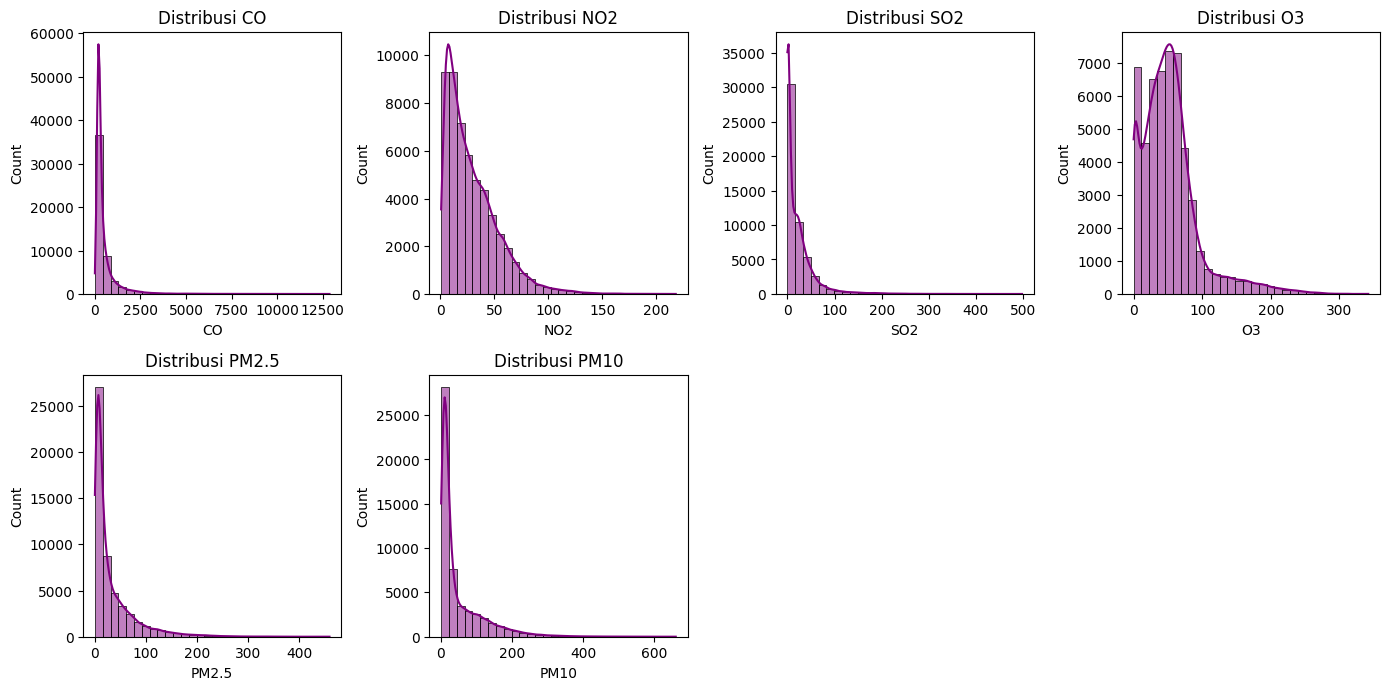

In [7]:
# Ditribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-8-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-8-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


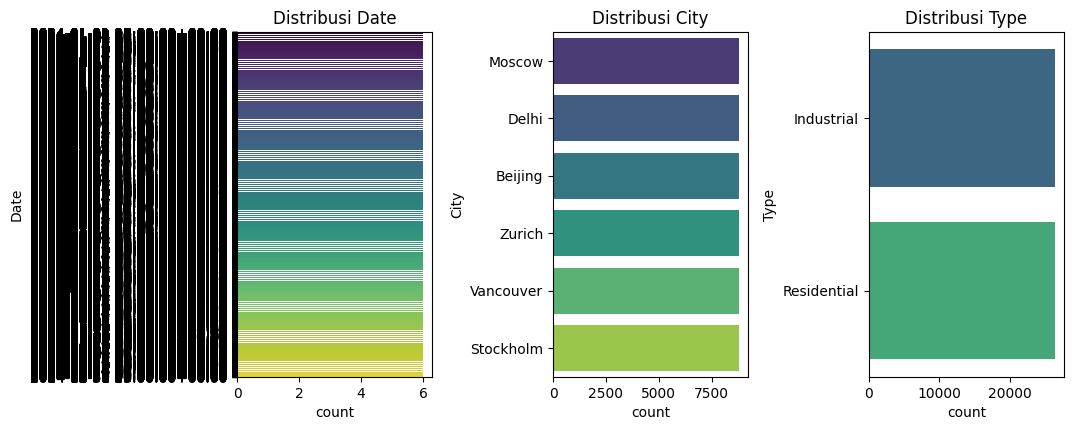

In [8]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

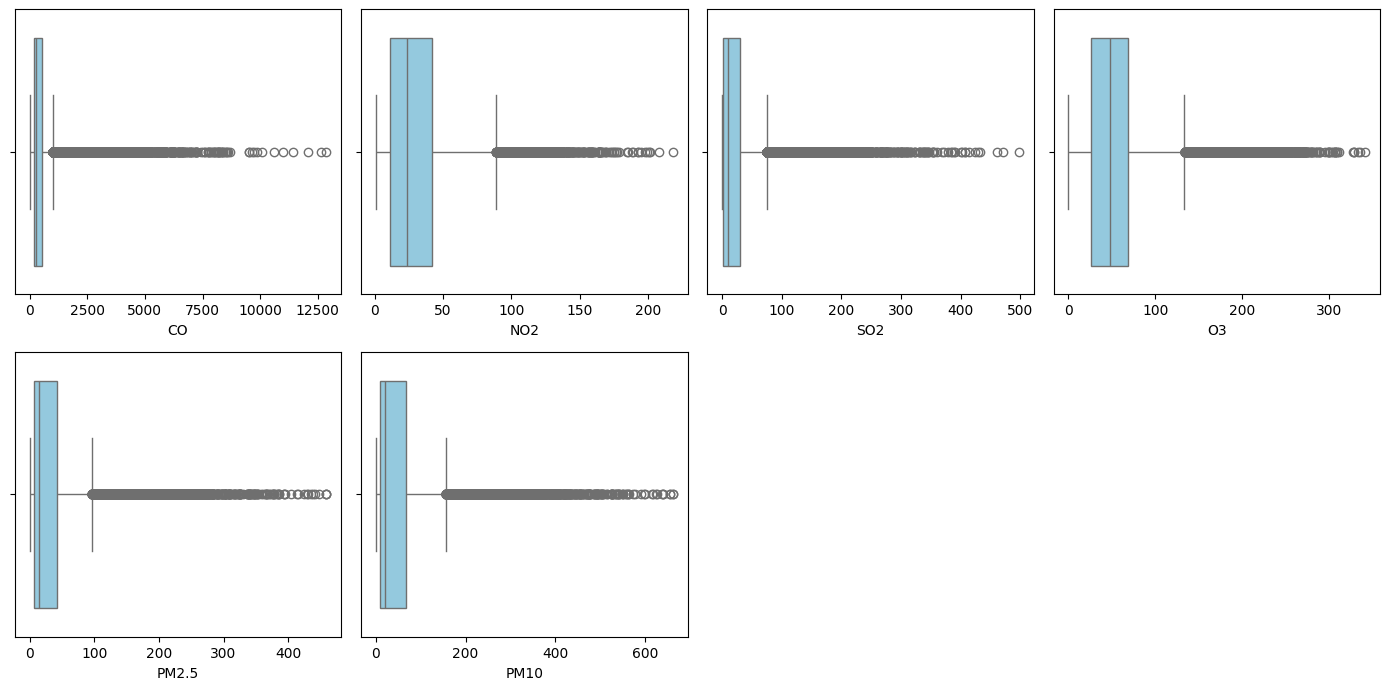

In [9]:
# Cek outlier pada dataset
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color='skyblue')

plt.tight_layout()
plt.show()

In [12]:
# Define the list of columns to treat outliers
columns_to_treat = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']

for column in columns_to_treat:
    # Calculate the median of the column
    col_median = df[column].median()

    # Calculate the IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    df[column] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound),
        col_median,
        df[column]
    )

print(f"Outliers in {', '.join(columns_to_treat)} replaced with the median.")

Outliers in CO, NO2, SO2, O3, PM2.5, PM10 replaced with the median.


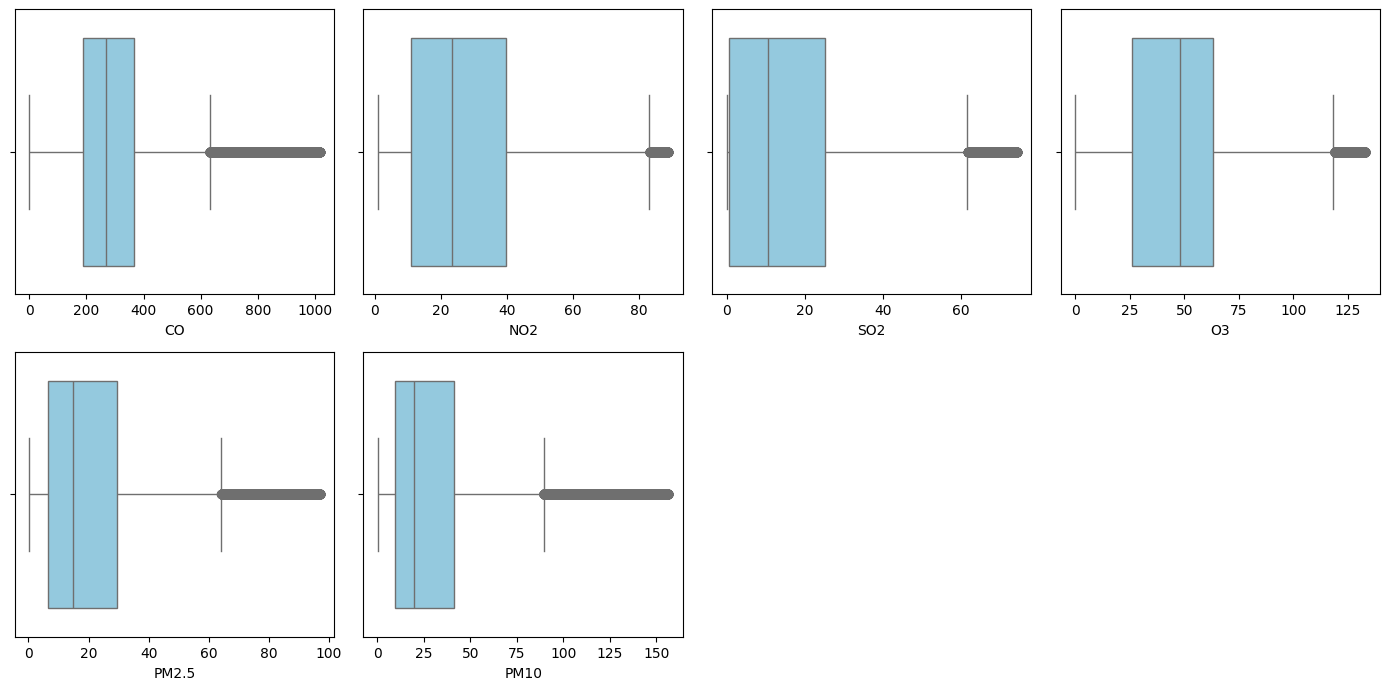

In [13]:
# Cek outlier pada dataset
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color='skyblue')

plt.tight_layout()
plt.show()

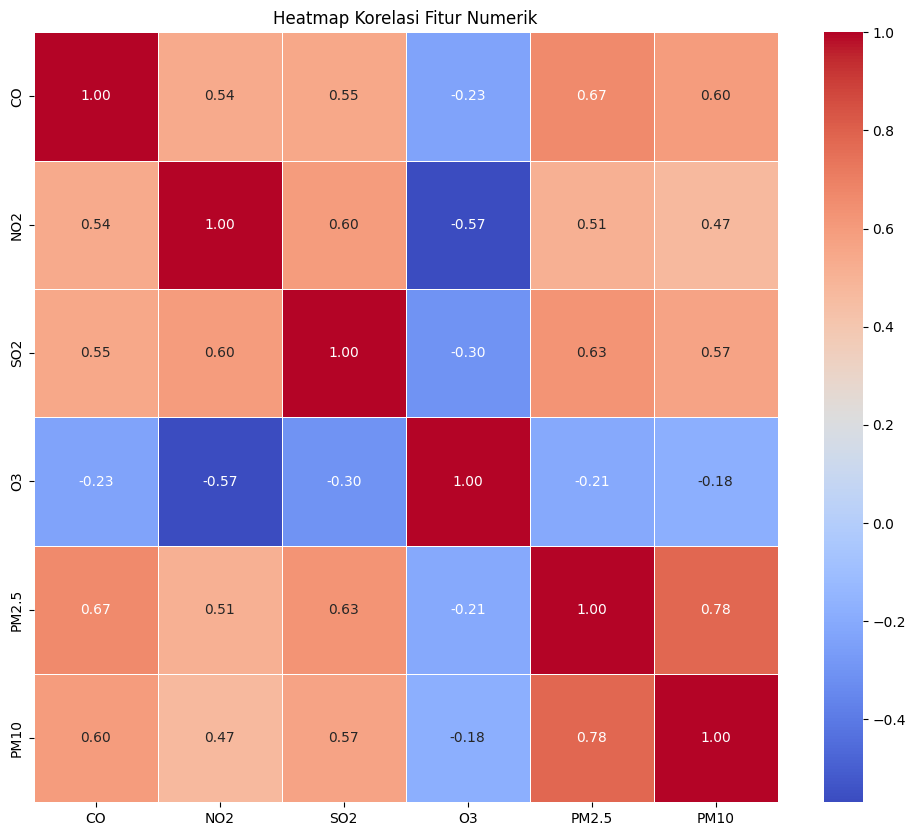

In [14]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

/tmp/ipython-input-15-417210954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='viridis')


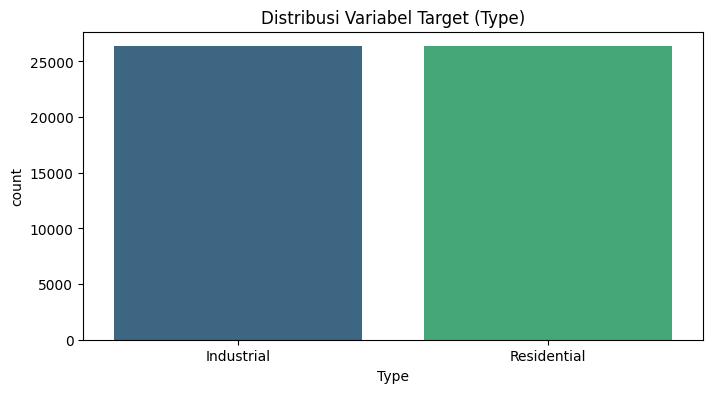

In [15]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Type)')
plt.show()

###Preprocessing Data

# Drop out Column

In [16]:
# Menghapus fitur 'Date','City' dari dataset
df = df.drop(['Date', 'City'],axis=1)
df

,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,263.0,34.5,27.2,27.0,13.6,20.0,Industrial
...,...,...,...,...,...,...,...
52699,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,160.0,3.9,0.3,73.0,1.4,2.6,Residential


# Encoding Categorical target

In [17]:
encoder = LabelEncoder()

# List kolom kategorikal yang perlu di encode
categorical_columns = ['Type']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

# Splitting data and Scaling

In [19]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Type'])
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat instance Standardisasi
scaler = StandardScaler()

# Fit dan transform data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Transform data uji
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled.shape

(42163, 6)

In [21]:
X_test_scaled.shape

(10541, 6)

In [22]:
y_train

,Type
9036,0
33745,1
12969,0
28691,1
42610,1
...,...
11284,0
44732,1
38158,1
860,0


# Modeling

#Stacking

In [27]:
# Implementasi model Stacking
# Mendefinisikan base models
base_learners = [
    ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=False, max_iter=-1, random_state=42)),
    ('abc', AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='deprecated', random_state=42)),
    ('gbc', GradientBoostingClassifier(n_estimators= 156, learning_rate=0.11836414531033324, max_depth=3)),
    ('rf', RandomForestClassifier(n_estimators=300,n_jobs=-1, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42, bootstrap=True)),
    ('mlp', MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', learning_rate='constant', max_iter=500, random_state=42))
]


# Mendefinisikan meta-model
meta_model = LogisticRegression(max_iter=500,random_state=42)

# Mendefinisikan StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_learners, final_estimator=meta_model
)

# Melatih Stacking model
stacking_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('svc', SVC(random_state=42)),
                               ('abc', AdaBoostClassifier(random_state=42)),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=0.11836414531033324,
                                                           n_estimators=156)),
                               ('rf',
                                RandomForestClassifier(n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('mlp',
                                MLPClassifier(hidden_layer_sizes=100,
                                              max_iter=500, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=500,
                                                      random_state=42))

# Evaluasi

In [28]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FN)': fn,
        'False Negative (FP)': fp,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilny
results = {
    'Stacking Model (LR)': evaluate_model(stacking_model,X_test_scaled, y_test),

}

# Buat DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Stacking Model (LR)  0.989849   0.989693  0.990249  0.989971


In [30]:
# Membuat fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)
    plt.show()

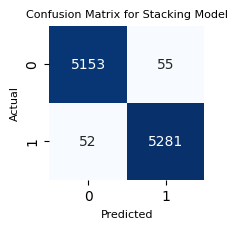

In [31]:
# Confusion Matrix dari model Stacking
stacking_cm = results['Stacking Model (LR)']['Confusion Matrix']
plot_confusion_matrix(stacking_cm, 'Stacking Model')

- True Positive (TP) = 5153: This means the model correctly predicted 5153 cases as "Residential."

- False Positive (FP) = 52: The model incorrectly identified 52 cases as "Residential," while they were actually "Industrial."

- True Negative (TN) = 5281: The model correctly identified 5281 cases as "Industrial."

- False Negative (FN) = 55: The model failed to identify 55 cases as "Industrial," while they were actually "Residential."

## Penjelasan Dataset dan Tujuan Prediksi

Dataset ini berisi data kualitas udara dari berbagai kota, mencakup informasi seperti tanggal, kota, konsentrasi berbagai polutan (CO, NO2, SO2, O3, PM2.5, PM10), dan tipe kota (Industrial atau Residential).

Tujuan dari analisis ini adalah untuk **memprediksi tipe kota (Industrial atau Residential)** berdasarkan data kualitas udara. Ini adalah masalah klasifikasi biner.

## Proses Analisis Data

Analisis data dilakukan melalui beberapa tahapan utama:

1.  **Memuat dan Membaca Data**: Data dimuat dari file CSV (`City_Types.csv`) dan ditampilkan untuk melihat struktur awal.
2.  **Informasi Data**: Memeriksa tipe data dan jumlah nilai non-null pada setiap kolom (`df.info()`).
3.  **Analisis Deskriptif**: Menampilkan statistik deskriptif untuk fitur numerik (`df.describe()`).
4.  **Pengecekan Missing Values dan Duplikat**: Memastikan tidak ada nilai yang hilang atau baris yang terduplikasi dalam dataset.
5.  **Visualisasi Data**:
    *   Distribusi fitur numerik ditampilkan menggunakan histogram dan KDE.
    *   Distribusi fitur kategorikal (termasuk target 'Type') ditampilkan menggunakan countplot.
    *   Outlier pada fitur numerik dideteksi menggunakan boxplot.
    *   Heatmap korelasi dibuat untuk memahami hubungan antar fitur numerik.
6.  **Preprocessing Data**:
    *   Fitur 'Date' dan 'City' dihapus karena tidak relevan untuk model prediksi tipe kota.
    *   Variabel target 'Type' yang bersifat kategorikal diubah menjadi numerik menggunakan `LabelEncoder`.
    *   Data dibagi menjadi set pelatihan (training set) dan set pengujian (testing set) menggunakan `train_test_split`.
    *   Fitur-fitur diskalakan menggunakan `StandardScaler` agar memiliki rata-rata 0 dan varians 1.

## Modeling

Model yang digunakan untuk prediksi adalah **Stacking Classifier**. Stacking adalah teknik ensemble di mana beberapa model dasar (base learners) dilatih, dan prediksi dari model-model dasar ini kemudian digunakan sebagai input untuk model akhir (meta-model).

Dalam kasus ini, model dasar yang digunakan adalah:
*   SVC (Support Vector Classifier)
*   AdaBoost Classifier
*   Gradient Boosting Classifier
*   Random Forest Classifier
*   MLP Classifier (Multi-layer Perceptron)

Sebagai meta-model, digunakan **Logistic Regression**. Meta-model ini mempelajari cara menggabungkan prediksi dari model dasar untuk membuat prediksi akhir. Dan mendapatkan akurasi sebesar 98%

## Evaluasi Model

Model dievaluasi menggunakan beberapa metrik umum untuk masalah klasifikasi biner:

*   **Confusion Matrix**: Tabel yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas (True Positive, False Positive, True Negative, False Negative).
*   **Accuracy**: Proporsi total prediksi yang benar.
*   **Precision**: Proporsi instance positif yang diprediksi dengan benar dari semua instance yang diprediksi sebagai positif.
*   **Recall (Sensitivity)**: Proporsi instance positif yang diprediksi dengan benar dari semua instance positif yang sebenarnya.
*   **F1-Score**: Rata-rata harmonis dari Precision dan Recall, memberikan keseimbangan antara kedua metrik tersebut.

Metrik-metrik ini membantu menilai seberapa baik model dalam memprediksi tipe kota (Industrial vs Residential).


## Dataset Explanation and Prediction Goal

This dataset contains air quality data from various cities, including information such as date, city, concentration of various pollutants (CO, NO2, SO2, O3, PM2.5, PM10), and city type (Industrial or Residential).

The goal of this analysis is to **predict the city type (Industrial or Residential)** based on air quality data. This is a binary classification problem.

## Data Analysis Process

Data analysis was conducted through several main stages:

1.  **Load and Read Data**: The data was loaded from the CSV file (`City_Types.csv`) and displayed to see the initial structure.
2.  **Data Information**: Checking data types and the number of non-null values in each column (`df.info()`).
3.  **Descriptive Analysis**: Displaying descriptive statistics for numerical features (`df.describe()`).
4.  **Checking for Missing Values and Duplicates**: Ensuring there are no missing values or duplicate rows in the dataset.
5.  **Data Visualization**:
    *   The distribution of numerical features is displayed using histograms and KDE.
    *   The distribution of categorical features (including the target 'Type') is displayed using countplots.
    *   Outliers in numerical features are detected using boxplots.
    *   A correlation heatmap is created to understand the relationship between numerical features.
6.  **Data Preprocessing**:
    *   The 'Date' and 'City' features are dropped as they are not relevant for the city type prediction model.
    *   The categorical target variable 'Type' is converted to numerical using `LabelEncoder`.
    *   The data is split into a training set and a testing set using `train_test_split`.
    *   The features are scaled using `StandardScaler` to have a mean of 0 and a variance of 1.

## Modeling

The model used for prediction is the **Stacking Classifier**. Stacking is an ensemble technique where several base models (base learners) are trained, and the predictions from these base models are then used as input for a final model (meta-model).

In this case, the base models used are:
*   SVC (Support Vector Classifier)
*   AdaBoost Classifier
*   Gradient Boosting Classifier
*   Random Forest Classifier
*   MLP Classifier (Multi-layer Perceptron)

**Logistic Regression** is used as the meta-model. This meta-model learns how to combine the predictions from the base models to make the final prediction. And get 98% accuracy

## Model Evaluation

The model is evaluated using several common metrics for binary classification problems:

*   **Confusion Matrix**: A table showing the number of correct and incorrect predictions for each class (True Positive, False Positive, True Negative, False Negative).
*   **Accuracy**: The proportion of total correct predictions.
*   **Precision**: The proportion of correctly predicted positive instances out of all instances predicted as positive.
*   **Recall (Sensitivity)**: The proportion of correctly predicted positive instances out of all actual positive instances.
*   **F1-Score**: The harmonic mean of Precision and Recall, providing a balance between the two metrics.

These metrics help assess how well the model performs in predicting city type (Industrial vs Residential).